# Image classification using TensorFlow

### Springboard Career Track Capstone Project 2

#### Linear Model in TensorFlow

#### Import libraries

In [1]:
import keras
from keras import optimizers
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Flatten, Activation
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.optimizers import Adam, Adadelta, SGD
from keras.utils import np_utils
from keras.callbacks import EarlyStopping, History, CSVLogger

import time
import matplotlib.pyplot as plt
% matplotlib inline

import numpy as np
from keras import backend as K
K.set_image_dim_ordering('tf')

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from IPython.core.pylabtools import figsize

Using TensorFlow backend.
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


#### Import data

Data acquired from keras.datasets

In [2]:
from keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

X_train.shape, X_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

In [3]:
# Normalize to values between 0 and 1
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255

In [4]:
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

Reshape for baseline model (no CNN)

In [5]:
x_train = np.reshape(X_train, (X_train.shape[0], -1))
x_test = np.reshape(X_test, (X_test.shape[0], -1))

In [6]:
x_train.shape, x_test.shape

((50000, 3072), (10000, 3072))

#### Create baseline model

Baseline models run with smaller than default learning rates for SGD and Adam and default for Adadelta.

All three models run for 50 epochs and a batch size of 1000, even though this may not be optimal in any way.

In [7]:
# define baseline model

num_pixels = 32 * 32 * 3
num_classes = 10

def baseline_model(optimizer='Adadelta'):
    # create model
    np.random.seed(911)
    model = Sequential()
    model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal', activation='relu'))
    model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
    
    SGD = keras.optimizers.SGD(lr=learning_rate, momentum=0.0, decay=0.0, nesterov=False)
    Adadelta = keras.optimizers.Adadelta(lr=1.0, rho=0.95, epsilon=None, decay=0.0)
    Adam = keras.optimizers.Adam(lr=learning_rate, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0)

    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

In [8]:
learning_rate=.0001
optimizer=SGD(lr=learning_rate)

# build the model
model_SGD = baseline_model()

# Fit the model
csv_logger = CSVLogger('model_SGD.log')

start = time.time()
SGD_res = model_SGD.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=50, batch_size=1000, verbose=1,
                       callbacks=[csv_logger])
end = time.time()

# save model to HDF5 file
model_SGD.save('SGD_res.h5')

# Final evaluation of the model
scores = model_SGD.evaluate(x_test, y_test, verbose=1)
print ("Model took %0.2f minutes to train" % ((end - start)/60))
print("Baseline Accuracy, SGD optimizer: %.2f%%" % (scores[1]*100))

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 3s 58us/step - loss: 11.7808 - acc: 0.1395 - val_loss: 11.1364 - val_acc: 0.1653
Epoch 2/50
50000/50000 [==============================] - 2s 38us/step - loss: 9.8191 - acc: 0.1647 - val_loss: 7.0421 - val_acc: 0.2065
Epoch 3/50
50000/50000 [==============================] - 2s 39us/step - loss: 4.1845 - acc: 0.2317 - val_loss: 2.2048 - val_acc: 0.2745
Epoch 4/50
50000/50000 [==============================] - 2s 39us/step - loss: 2.0517 - acc: 0.3116 - val_loss: 1.8984 - val_acc: 0.3294
Epoch 5/50
50000/50000 [==============================] - 2s 38us/step - loss: 1.9306 - acc: 0.3320 - val_loss: 1.9253 - val_acc: 0.3380
Epoch 6/50
50000/50000 [==============================] - 2s 39us/step - loss: 1.8690 - acc: 0.3536 - val_loss: 1.9884 - val_acc: 0.3335
Epoch 7/50
50000/50000 [==============================] - 2s 40us/step - loss: 1.8298 - acc: 0.3664 - val_loss: 1.7284 - val_a

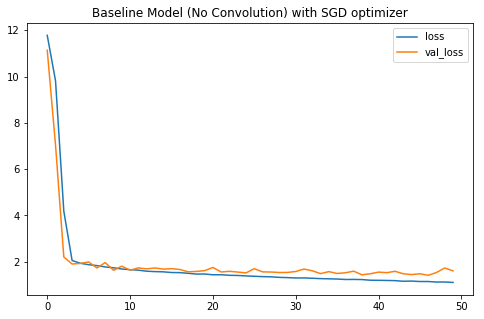

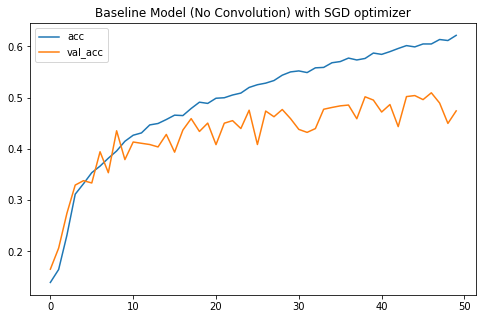

In [9]:
plt.figure(figsize=(8,5));
plt.plot(SGD_res.history['loss']);
plt.plot(SGD_res.history['val_loss']);
plt.legend(['loss','val_loss']);
plt.title('Baseline Model (No Convolution) with SGD optimizer');

plt.figure(figsize=(8,5));
plt.plot(SGD_res.history['acc']);
plt.plot(SGD_res.history['val_acc']);
plt.legend(['acc','val_acc']);
plt.title('Baseline Model (No Convolution) with SGD optimizer');

In [10]:
num_pixels = 32 * 32 * 3
num_classes = 10

optimizer=Adadelta(lr=1.0)

# build the model
model_AD = baseline_model()

# Fit the model
csv_logger = CSVLogger('model_AD.log')

start = time.time()
AD_res = model_AD.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=50, batch_size=1000, verbose=1,
                       callbacks=[csv_logger])
end = time.time()

# save model to HDF5 file
model_AD.save('AD_res.h5')

# Final evaluation of the model
scores = model_AD.evaluate(x_test, y_test, verbose=1)
print ("Model took %0.2f minutes to train" % ((end - start)/60))
print("Baseline Accuracy, Adadelta optimizer: %.2f%%" % (scores[1]*100))

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 2s 43us/step - loss: 11.6966 - acc: 0.1419 - val_loss: 12.7335 - val_acc: 0.1139
Epoch 2/50
50000/50000 [==============================] - 2s 39us/step - loss: 10.1652 - acc: 0.1603 - val_loss: 8.0363 - val_acc: 0.2036
Epoch 3/50
50000/50000 [==============================] - 2s 39us/step - loss: 5.0622 - acc: 0.2188 - val_loss: 2.2954 - val_acc: 0.2157
Epoch 4/50
50000/50000 [==============================] - 2s 39us/step - loss: 2.0675 - acc: 0.3067 - val_loss: 1.8700 - val_acc: 0.3400
Epoch 5/50
50000/50000 [==============================] - 2s 39us/step - loss: 1.9446 - acc: 0.3360 - val_loss: 1.8360 - val_acc: 0.3500
Epoch 6/50
50000/50000 [==============================] - 2s 39us/step - loss: 1.8770 - acc: 0.3535 - val_loss: 1.8558 - val_acc: 0.3445
Epoch 7/50
50000/50000 [==============================] - 2s 39us/step - loss: 1.8347 - acc: 0.3662 - val_loss: 1.8067 - val_

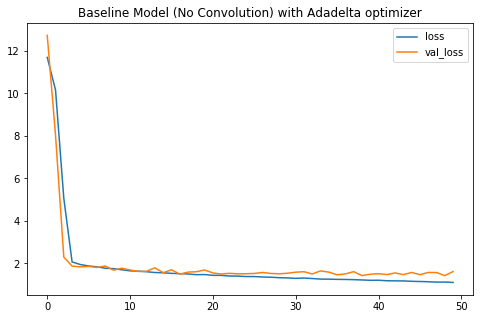

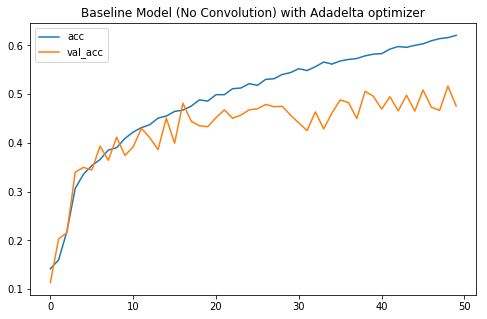

In [11]:
plt.figure(figsize=(8,5));
plt.plot(AD_res.history['loss']);
plt.plot(AD_res.history['val_loss']);
plt.legend(['loss','val_loss']);
plt.title('Baseline Model (No Convolution) with Adadelta optimizer');

plt.figure(figsize=(8,5));
plt.plot(AD_res.history['acc']);
plt.plot(AD_res.history['val_acc']);
plt.legend(['acc','val_acc']);
plt.title('Baseline Model (No Convolution) with Adadelta optimizer');

In [12]:
num_pixels = 32 * 32 * 3
num_classes = 10

learning_rate=.0001
optimizer=Adam(lr=learning_rate)

# build the model
model_Adam = baseline_model()

# Fit the model
csv_logger = CSVLogger('model_Adam.log')

start = time.time()
Adam_res = model_Adam.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=50, batch_size=1000, verbose=1,
                       callbacks=[csv_logger])
end = time.time()

# save model to HDF5 file
model_Adam.save('Adam_res.h5')

# Final evaluation of the model
scores = model_Adam.evaluate(x_test, y_test, verbose=1)
print ("Model took %0.2f minutes to train" % ((end - start)/60))
print("Baseline Accuracy, Adam optimizer: %.2f%%" % (scores[1]*100))

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 2s 43us/step - loss: 11.6940 - acc: 0.1421 - val_loss: 12.7466 - val_acc: 0.1155
Epoch 2/50
50000/50000 [==============================] - 2s 39us/step - loss: 10.2389 - acc: 0.1585 - val_loss: 7.4235 - val_acc: 0.1716
Epoch 3/50
50000/50000 [==============================] - 2s 39us/step - loss: 4.9673 - acc: 0.2201 - val_loss: 2.2371 - val_acc: 0.2436
Epoch 4/50
50000/50000 [==============================] - 2s 39us/step - loss: 2.0730 - acc: 0.3082 - val_loss: 1.8389 - val_acc: 0.3587
Epoch 5/50
50000/50000 [==============================] - 2s 39us/step - loss: 1.9693 - acc: 0.3282 - val_loss: 1.9716 - val_acc: 0.3574
Epoch 6/50
50000/50000 [==============================] - 2s 39us/step - loss: 1.8863 - acc: 0.3521 - val_loss: 1.7674 - val_acc: 0.3766
Epoch 7/50
50000/50000 [==============================] - 2s 39us/step - loss: 1.8310 - acc: 0.3664 - val_loss: 1.8642 - val_

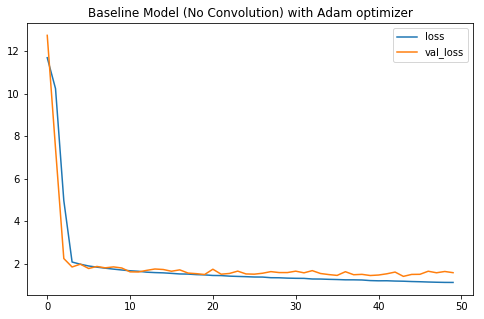

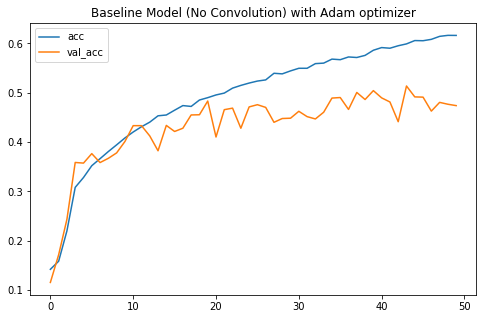

In [ ]:
plt.figure(figsize=(8,5));
plt.plot(Adam_res.history['loss']);
plt.plot(Adam_res.history['val_loss']);
plt.legend(['loss','val_loss']);
plt.title('Baseline Model (No Convolution) with Adam optimizer');

plt.figure(figsize=(8,5));
plt.plot(Adam_res.history['acc']);
plt.plot(Adam_res.history['val_acc']);
plt.legend(['acc','val_acc']);
plt.title('Baseline Model (No Convolution) with Adam optimizer');

GridSearch for batch size and epochs

In [8]:
num_pixels = 32 * 32 * 3
num_classes = 10

from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

model = KerasClassifier(build_fn=baseline_model, verbose=1)

# define the grid search parameters
batch_size = [64, 128]
epochs = [100]
learning_rate = .0001 #[.0001, .001, .01, .1, 1]
param_grid = dict(batch_size=batch_size, epochs=epochs)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=1)
start = time.time()
grid_result = grid.fit(x_train, y_train)
end = time.time()

# summarize results
print('Training time = %.2f minutes' % ((end-start)/60))
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Epoch 1/100
33333/33333 [==============================] - 10s 301us/step - loss: 4.1540 - acc: 0.2489
Epoch 2/100
33333/33333 [==============================] - 9s 274us/step - loss: 1.8015 - acc: 0.3603
Epoch 3/100
33333/33333 [==============================] - 9s 274us/step - loss: 1.6771 - acc: 0.4032
Epoch 4/100
33333/33333 [==============================] - 9s 274us/step - loss: 1.6028 - acc: 0.4269
Epoch 5/100
33333/33333 [==============================] - 9s 274us/step - loss: 1.5417 - acc: 0.4529
Epoch 6/100
33333/33333 [==============================] - 9s 274us/step - loss: 1.4970 - acc: 0.4713
Epoch 7/100
33333/33333 [==============================] - 9s 276us/step - loss: 1.4538 - acc: 0.4856
Epoch 8/100
33333/33333 [==============================] - 9s 281us/step - loss: 1.4133 - acc: 0.5008
Epoch 9/100
33333/33333 [==============================] - 9s 274us/step - loss: 1.3797 - acc: 0.5153
Epoch 10/100
33333/33333 [==============================] - 9s 275us/step - loss:

33333/33333 [==============================] - 9s 275us/step - loss: 0.2122 - acc: 0.9303
Epoch 81/100
33333/33333 [==============================] - 9s 275us/step - loss: 0.2140 - acc: 0.9290
Epoch 82/100
33333/33333 [==============================] - 9s 275us/step - loss: 0.2047 - acc: 0.9326
Epoch 83/100
33333/33333 [==============================] - 9s 275us/step - loss: 0.2011 - acc: 0.9343
Epoch 84/100
33333/33333 [==============================] - 9s 275us/step - loss: 0.1994 - acc: 0.9329
Epoch 85/100
33333/33333 [==============================] - 9s 274us/step - loss: 0.1992 - acc: 0.9348
Epoch 86/100
33333/33333 [==============================] - 9s 274us/step - loss: 0.1911 - acc: 0.9374
Epoch 87/100
33333/33333 [==============================] - 9s 274us/step - loss: 0.1814 - acc: 0.9392
Epoch 88/100
33333/33333 [==============================] - 9s 274us/step - loss: 0.1815 - acc: 0.9390
Epoch 89/100
33333/33333 [==============================] - 9s 275us/step - loss: 0.17

33333/33333 [==============================] - 9s 276us/step - loss: 0.3803 - acc: 0.8705
Epoch 59/100
33333/33333 [==============================] - 9s 275us/step - loss: 0.3677 - acc: 0.8760
Epoch 60/100
33333/33333 [==============================] - 9s 275us/step - loss: 0.3553 - acc: 0.8804
Epoch 61/100
33333/33333 [==============================] - 9s 275us/step - loss: 0.3472 - acc: 0.8821
Epoch 62/100
33333/33333 [==============================] - 9s 275us/step - loss: 0.3421 - acc: 0.8831
Epoch 63/100
33333/33333 [==============================] - 9s 276us/step - loss: 0.3231 - acc: 0.8921
Epoch 64/100
33333/33333 [==============================] - 9s 275us/step - loss: 0.3187 - acc: 0.8923
Epoch 65/100
33333/33333 [==============================] - 9s 275us/step - loss: 0.3120 - acc: 0.8954
Epoch 66/100
33333/33333 [==============================] - 9s 275us/step - loss: 0.3021 - acc: 0.8992
Epoch 67/100
33333/33333 [==============================] - 9s 275us/step - loss: 0.30

33334/33334 [==============================] - 9s 275us/step - loss: 0.6746 - acc: 0.7678
Epoch 37/100
33334/33334 [==============================] - 9s 275us/step - loss: 0.6549 - acc: 0.7709
Epoch 38/100
33334/33334 [==============================] - 9s 276us/step - loss: 0.6387 - acc: 0.7792
Epoch 39/100
33334/33334 [==============================] - 9s 276us/step - loss: 0.6185 - acc: 0.7879
Epoch 40/100
33334/33334 [==============================] - 9s 275us/step - loss: 0.6044 - acc: 0.7903
Epoch 41/100
33334/33334 [==============================] - 9s 275us/step - loss: 0.5903 - acc: 0.7953
Epoch 42/100
33334/33334 [==============================] - 9s 276us/step - loss: 0.5737 - acc: 0.8032
Epoch 43/100
33334/33334 [==============================] - 9s 276us/step - loss: 0.5581 - acc: 0.8075
Epoch 44/100
33334/33334 [==============================] - 9s 275us/step - loss: 0.5382 - acc: 0.8163
Epoch 45/100
33334/33334 [==============================] - 9s 276us/step - loss: 0.52

33333/33333 [==============================] - 5s 146us/step - loss: 1.2757 - acc: 0.5510
Epoch 15/100
33333/33333 [==============================] - 5s 145us/step - loss: 1.2468 - acc: 0.5622
Epoch 16/100
33333/33333 [==============================] - 5s 145us/step - loss: 1.2134 - acc: 0.5750
Epoch 17/100
33333/33333 [==============================] - 5s 146us/step - loss: 1.1881 - acc: 0.5823
Epoch 18/100
33333/33333 [==============================] - 5s 146us/step - loss: 1.1547 - acc: 0.5949
Epoch 19/100
33333/33333 [==============================] - 5s 145us/step - loss: 1.1334 - acc: 0.6030
Epoch 20/100
33333/33333 [==============================] - 5s 146us/step - loss: 1.1055 - acc: 0.6128
Epoch 21/100
33333/33333 [==============================] - 5s 146us/step - loss: 1.0811 - acc: 0.6236
Epoch 22/100
33333/33333 [==============================] - 5s 146us/step - loss: 1.0526 - acc: 0.6330
Epoch 23/100
33333/33333 [==============================] - 5s 146us/step - loss: 1.03

33333/33333 [==============================] - 5s 146us/step - loss: 0.2253 - acc: 0.9325
Epoch 94/100
33333/33333 [==============================] - 5s 145us/step - loss: 0.1936 - acc: 0.9441
Epoch 95/100
33333/33333 [==============================] - 5s 145us/step - loss: 0.2077 - acc: 0.9392
Epoch 96/100
33333/33333 [==============================] - 5s 145us/step - loss: 0.2169 - acc: 0.9375
Epoch 97/100
33333/33333 [==============================] - 5s 146us/step - loss: 0.1889 - acc: 0.9490
Epoch 98/100
33333/33333 [==============================] - 5s 146us/step - loss: 0.1895 - acc: 0.9415
Epoch 99/100
33333/33333 [==============================] - 5s 146us/step - loss: 0.1875 - acc: 0.9460
Epoch 100/100
33333/33333 [==============================] - 1s 23us/step
Epoch 1/100
33333/33333 [==============================] - 5s 152us/step - loss: 6.1670 - acc: 0.2165
Epoch 2/100
33333/33333 [==============================] - 5s 146us/step - loss: 1.9207 - acc: 0.3311
Epoch 3/100
33

33333/33333 [==============================] - 5s 147us/step - loss: 0.3219 - acc: 0.8971
Epoch 72/100
33333/33333 [==============================] - 5s 147us/step - loss: 0.3196 - acc: 0.8973
Epoch 73/100
33333/33333 [==============================] - 5s 147us/step - loss: 0.3123 - acc: 0.8982
Epoch 74/100
33333/33333 [==============================] - 5s 146us/step - loss: 0.3150 - acc: 0.8996
Epoch 75/100
33333/33333 [==============================] - 5s 146us/step - loss: 0.2985 - acc: 0.9032
Epoch 76/100
33333/33333 [==============================] - 5s 146us/step - loss: 0.2984 - acc: 0.9049
Epoch 77/100
33333/33333 [==============================] - 5s 146us/step - loss: 0.2866 - acc: 0.9079
Epoch 78/100
33333/33333 [==============================] - 5s 146us/step - loss: 0.2806 - acc: 0.9129
Epoch 79/100
33333/33333 [==============================] - 5s 146us/step - loss: 0.2722 - acc: 0.9159
Epoch 80/100
33333/33333 [==============================] - 5s 146us/step - loss: 0.26

33334/33334 [==============================] - 5s 145us/step - loss: 0.5418 - acc: 0.8150
Epoch 50/100
33334/33334 [==============================] - 5s 145us/step - loss: 0.5221 - acc: 0.8228
Epoch 51/100
33334/33334 [==============================] - 5s 145us/step - loss: 0.5115 - acc: 0.8291
Epoch 52/100
33334/33334 [==============================] - 5s 146us/step - loss: 0.5075 - acc: 0.8289
Epoch 53/100
33334/33334 [==============================] - 5s 146us/step - loss: 0.4913 - acc: 0.8356
Epoch 54/100
33334/33334 [==============================] - 5s 146us/step - loss: 0.4838 - acc: 0.8354
Epoch 55/100
33334/33334 [==============================] - 5s 145us/step - loss: 0.4668 - acc: 0.8463
Epoch 56/100
33334/33334 [==============================] - 5s 145us/step - loss: 0.4553 - acc: 0.8479
Epoch 57/100
33334/33334 [==============================] - 5s 146us/step - loss: 0.4471 - acc: 0.8497
Epoch 58/100
33334/33334 [==============================] - 5s 145us/step - loss: 0.43

50000/50000 [==============================] - 14s 275us/step - loss: 0.8695 - acc: 0.6976
Epoch 28/100
50000/50000 [==============================] - 14s 276us/step - loss: 0.8520 - acc: 0.7023
Epoch 29/100
50000/50000 [==============================] - 14s 276us/step - loss: 0.8282 - acc: 0.7128
Epoch 30/100
50000/50000 [==============================] - 14s 276us/step - loss: 0.8055 - acc: 0.7200
Epoch 31/100
50000/50000 [==============================] - 14s 276us/step - loss: 0.7854 - acc: 0.7239
Epoch 32/100
50000/50000 [==============================] - 14s 276us/step - loss: 0.7649 - acc: 0.7328
Epoch 33/100
50000/50000 [==============================] - 14s 276us/step - loss: 0.7541 - acc: 0.7358
Epoch 34/100
50000/50000 [==============================] - 14s 275us/step - loss: 0.7297 - acc: 0.7467
Epoch 35/100
50000/50000 [==============================] - 14s 276us/step - loss: 0.7119 - acc: 0.7532
Epoch 36/100
50000/50000 [==============================] - 14s 276us/step - 

#### Create Convolutional Neural Network

Basic convolutional model (6 hidden layers), three versions (same optimizer, different learning rates).

In [9]:
def convolution_model():
    # create model
    model = Sequential()
    model.add(Conv2D(32, (5, 5), input_shape=(32, 32, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
    model.add(Conv2D(64, (5, 5), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    # Compile model
    np.random.seed(911)
    model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=learning_rate), metrics=['accuracy'])
    model.summary()
    return model

In [10]:
# build the model
conv_001 = convolution_model()
learning_rate=.001

# Fit the model
csv_logger = CSVLogger('conv_001.log')

start = time.time()
results_conv_001 = conv_001.fit(X_train, y_train, 
                             validation_data = (X_test, y_test), 
                             epochs=100, batch_size=128, verbose=1,
                             callbacks=[csv_logger])
end = time.time()

# save model to HDF5 file
conv_001.save('model_conv_001.h5')

# Final evaluation of the model
scores = conv_001.evaluate(X_test, y_test, verbose=1)
print ("Model took %0.2f minutes to train" % ((end - start)/60))
print("Basic Convolutional Model Accuracy for lr=.001 is: %.2f%%" % (scores[1]*100))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        2432      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 64)        51264     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_15 (Dense)             (None, 128)               204928    
__________

50000/50000 [==============================] - 6s 118us/step - loss: 0.7407 - acc: 0.7436 - val_loss: 0.8343 - val_acc: 0.7085
Epoch 50/100
50000/50000 [==============================] - 6s 118us/step - loss: 0.7309 - acc: 0.7469 - val_loss: 0.8364 - val_acc: 0.7074
Epoch 51/100
50000/50000 [==============================] - 6s 118us/step - loss: 0.7255 - acc: 0.7515 - val_loss: 0.8242 - val_acc: 0.7123
Epoch 52/100
50000/50000 [==============================] - 6s 118us/step - loss: 0.7211 - acc: 0.7517 - val_loss: 0.8254 - val_acc: 0.7147
Epoch 53/100
50000/50000 [==============================] - 6s 118us/step - loss: 0.7134 - acc: 0.7537 - val_loss: 0.8369 - val_acc: 0.7095
Epoch 54/100
50000/50000 [==============================] - 6s 118us/step - loss: 0.7086 - acc: 0.7551 - val_loss: 0.8434 - val_acc: 0.7082
Epoch 55/100
50000/50000 [==============================] - 6s 118us/step - loss: 0.6979 - acc: 0.7611 - val_loss: 0.8192 - val_acc: 0.7160
Epoch 56/100
50000/50000 [=======

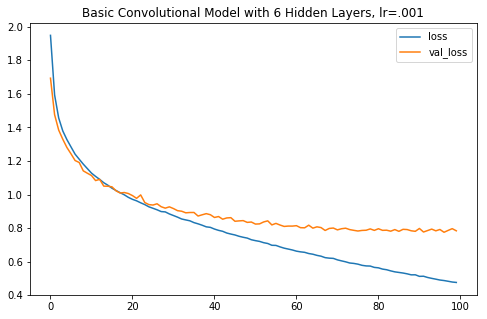

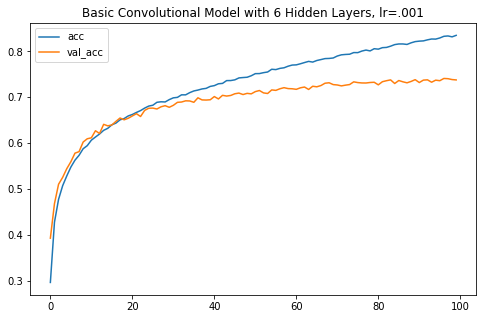

In [11]:
plt.figure(figsize=(8,5));
plt.plot(results_conv_001.history['loss']);
plt.plot(results_conv_001.history['val_loss']);
plt.legend(['loss','val_loss']);
plt.title('Basic Convolutional Model with 6 Hidden Layers, lr=.001');

plt.figure(figsize=(8,5));
plt.plot(results_conv_001.history['acc']);
plt.plot(results_conv_001.history['val_acc']);
plt.legend(['acc','val_acc']);
plt.title('Basic Convolutional Model with 6 Hidden Layers, lr=.001');

In [12]:
# build the model
conv_0001 = convolution_model()
learning_rate=.0001

# Fit the model
csv_logger = CSVLogger('conv_0001.log')

start = time.time()
results_conv_0001 = conv_0001.fit(X_train, y_train, 
                             validation_data = (X_test, y_test), 
                             epochs=100, batch_size=128, verbose=1,
                       callbacks=[csv_logger])
end = time.time()

# save model to HDF5 file
conv_0001.save('model_conv_0001.h5')

# Final evaluation of the model
scores = conv_0001.evaluate(X_test, y_test, verbose=1)
print ("Model took %0.2f minutes to train" % ((end - start)/60))
print("Basic Convolutional Model Accuracy for lr=.0001 is: %.2f%%" % (scores[1]*100))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 28, 28, 32)        2432      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 10, 10, 64)        51264     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_17 (Dense)             (None, 128)               204928    
__________

50000/50000 [==============================] - 6s 119us/step - loss: 0.2563 - acc: 0.9078 - val_loss: 1.1767 - val_acc: 0.7200
Epoch 50/100
50000/50000 [==============================] - 6s 118us/step - loss: 0.2411 - acc: 0.9140 - val_loss: 1.1418 - val_acc: 0.7204
Epoch 51/100
50000/50000 [==============================] - 6s 118us/step - loss: 0.2483 - acc: 0.9101 - val_loss: 1.1688 - val_acc: 0.7212
Epoch 52/100
50000/50000 [==============================] - 6s 118us/step - loss: 0.2437 - acc: 0.9124 - val_loss: 1.2156 - val_acc: 0.7092
Epoch 53/100
50000/50000 [==============================] - 6s 118us/step - loss: 0.2478 - acc: 0.9137 - val_loss: 1.1936 - val_acc: 0.7164
Epoch 54/100
50000/50000 [==============================] - 6s 119us/step - loss: 0.2377 - acc: 0.9156 - val_loss: 1.1757 - val_acc: 0.7177
Epoch 55/100
50000/50000 [==============================] - 6s 119us/step - loss: 0.2346 - acc: 0.9172 - val_loss: 1.1692 - val_acc: 0.7234
Epoch 56/100
50000/50000 [=======

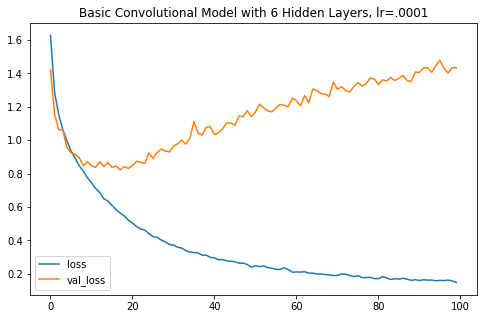

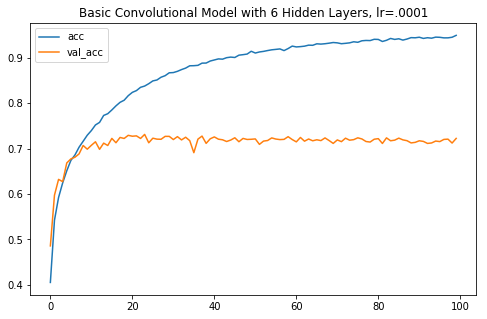

In [13]:
plt.figure(figsize=(8,5));
plt.plot(results_conv_0001.history['loss']);
plt.plot(results_conv_0001.history['val_loss']);
plt.legend(['loss','val_loss']);
plt.title('Basic Convolutional Model with 6 Hidden Layers, lr=.0001');

plt.figure(figsize=(8,5));
plt.plot(results_conv_0001.history['acc']);
plt.plot(results_conv_0001.history['val_acc']);
plt.legend(['acc','val_acc']);
plt.title('Basic Convolutional Model with 6 Hidden Layers, lr=.0001');

In [14]:
# build the model
conv_00001 = convolution_model()
learning_rate=.00001

# Fit the model
csv_logger = CSVLogger('conv_00001.log')

start = time.time()
results_conv_00001 = conv_00001.fit(X_train, y_train, 
                             validation_data = (X_test, y_test), 
                             epochs=100, batch_size=128, verbose=1,
                       callbacks=[csv_logger])
end = time.time()

# save model to HDF5 file
conv_00001.save('model_conv_00001.h5')

# Final evaluation of the model
scores = conv_00001.evaluate(X_test, y_test, verbose=1)
print ("Model took %0.2f minutes to train" % ((end - start)/60))
print("Basic Convolutional Model Accuracy for lr=.00001 is: %.2f%%" % (scores[1]*100))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 28, 28, 32)        2432      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 10, 10, 64)        51264     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_19 (Dense)             (None, 128)               204928    
__________

50000/50000 [==============================] - 6s 123us/step - loss: 0.7376 - acc: 0.7462 - val_loss: 0.8376 - val_acc: 0.7113
Epoch 50/100
50000/50000 [==============================] - 6s 120us/step - loss: 0.7301 - acc: 0.7497 - val_loss: 0.8374 - val_acc: 0.7126
Epoch 51/100
50000/50000 [==============================] - 6s 118us/step - loss: 0.7242 - acc: 0.7510 - val_loss: 0.8297 - val_acc: 0.7157
Epoch 52/100
50000/50000 [==============================] - 6s 118us/step - loss: 0.7195 - acc: 0.7526 - val_loss: 0.8309 - val_acc: 0.7151
Epoch 53/100
50000/50000 [==============================] - 6s 118us/step - loss: 0.7121 - acc: 0.7548 - val_loss: 0.8531 - val_acc: 0.7083
Epoch 54/100
50000/50000 [==============================] - 6s 118us/step - loss: 0.7066 - acc: 0.7560 - val_loss: 0.8495 - val_acc: 0.7125
Epoch 55/100
50000/50000 [==============================] - 6s 119us/step - loss: 0.6978 - acc: 0.7597 - val_loss: 0.8247 - val_acc: 0.7177
Epoch 56/100
50000/50000 [=======

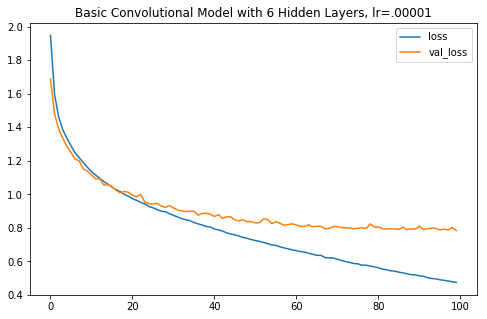

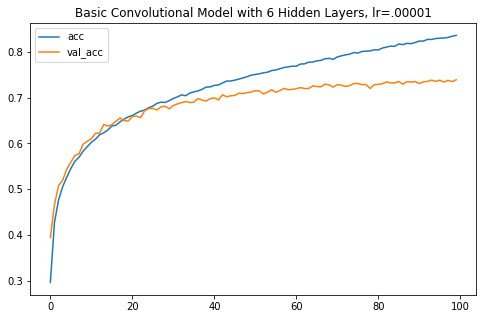

In [15]:
plt.figure(figsize=(8,5));
plt.plot(results_conv_00001.history['loss']);
plt.plot(results_conv_00001.history['val_loss']);
plt.legend(['loss','val_loss']);
plt.title('Basic Convolutional Model with 6 Hidden Layers, lr=.00001');

plt.figure(figsize=(8,5));
plt.plot(results_conv_00001.history['acc']);
plt.plot(results_conv_00001.history['val_acc']);
plt.legend(['acc','val_acc']);
plt.title('Basic Convolutional Model with 6 Hidden Layers, lr=.00001');

The convolutional model defined below was determined through trial and error. The number of hidden layers is consistent, but the number of filters, kernel size, dense layer sizes, and learning rates will be adjusted to show the impact of changing these hyperparameters.

In [16]:
# Define the model
def cnn(filter1, filter2, filter3, dense1, dense2, kernel_size, learning_rate):
    model = Sequential()
    model.add(Conv2D(filter1, kernel_size=kernel_size, activation='relu', padding='same', input_shape=(32, 32, 3)))
    model.add(Conv2D(filter1, kernel_size=kernel_size, activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Conv2D(filter2, kernel_size=kernel_size, activation='relu', padding='same'))
    model.add(Conv2D(filter2, kernel_size=kernel_size, activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Conv2D(filter3, kernel_size=kernel_size, activation='relu', padding='same'))
    model.add(Conv2D(filter3, kernel_size=kernel_size, activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(dense1, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(dense2, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(10, activation='softmax'))
    
    # Compile the model
    model.compile(optimizer=Adam(lr=learning_rate), loss='categorical_crossentropy', metrics=['accuracy'])
    model.summary()
    return model

In all the trained models below, 'i' is the number of filters in the first two layers (i.e. 'filter1'), and all the other filters and dense layers are multiples of 'i'. This has the effect of increasing the number of neurons in the hidden layers dramatically, with the net effect of improving the accuracy of the model. 

In addition, the learning rate is adjusted to different levels within each combination of 'i' filters. Batch size (128) and optimizer (Adam) will be held constant. Epochs will be set to 100, and set to stop early using Keras callback EarlyStopping. Whichever model yields the best accuracy will be run for a full 200 epochs.

Lastly, the learning rate of .01 was determined previously to return accuracy of 10% for this model, so it will not be used. Instead, learning rates of .001, .0001, and .00001 will be used for training.

In [17]:
i=32
cnn32_001 = cnn(i,2*i,4*i,12*i,6*i,2,.001) # i=32, lr=.001
batch_size = 128
epochs = 100

# Train the model
csv_logger = CSVLogger('cnn32_001.log')

start = time.time()
model32_001 = cnn32_001.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, 
                            validation_data = (X_test, y_test), verbose=1, 
                            callbacks=[csv_logger, EarlyStopping(min_delta=0.0005, patience=10)])
end = time.time()

# save model to HDF5 file
cnn32_001.save('model32_001.h5')

# compute test accuracy
scores = cnn32_001.evaluate(X_test, y_test, verbose=1)
print ("Model took %0.2f minutes to train" % ((end - start)/60))
print ("Accuracy on test data is: %0.2f" % (scores[1]*100))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 32, 32, 32)        416       
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 31, 31, 32)        4128      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 15, 15, 64)        8256      
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 14, 14, 64)        16448     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 7, 7, 64)          0         
__________

50000/50000 [==============================] - 14s 273us/step - loss: 0.5542 - acc: 0.8096 - val_loss: 0.5648 - val_acc: 0.8114
Epoch 40/100
50000/50000 [==============================] - 14s 273us/step - loss: 0.5541 - acc: 0.8115 - val_loss: 0.5749 - val_acc: 0.8045
Epoch 41/100
50000/50000 [==============================] - 14s 273us/step - loss: 0.5508 - acc: 0.8096 - val_loss: 0.5573 - val_acc: 0.8082
Epoch 42/100
50000/50000 [==============================] - 14s 273us/step - loss: 0.5425 - acc: 0.8126 - val_loss: 0.5916 - val_acc: 0.7982
Epoch 43/100
50000/50000 [==============================] - 14s 272us/step - loss: 0.5334 - acc: 0.8169 - val_loss: 0.5631 - val_acc: 0.8129
Epoch 44/100
50000/50000 [==============================] - 14s 272us/step - loss: 0.5380 - acc: 0.8143 - val_loss: 0.5970 - val_acc: 0.8049
Epoch 45/100
50000/50000 [==============================] - 14s 272us/step - loss: 0.5298 - acc: 0.8180 - val_loss: 0.5805 - val_acc: 0.8040
Epoch 46/100
50000/50000 [

Text(0.5,1,'Convolutional Neural Network with 16 Hidden Layers, i=32, lr=.001')

Text(0.5,1,'Convolutional Neural Network with 16 Hidden Layers, i=32, lr=.001')

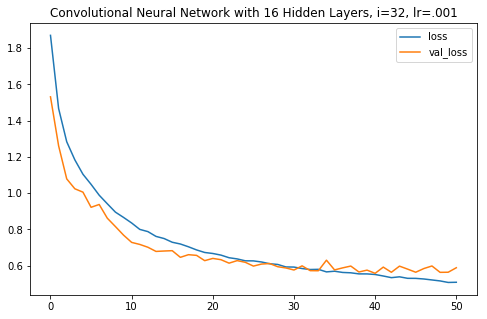

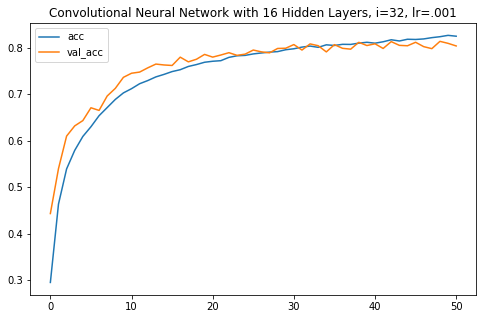

In [48]:
plt.figure(figsize=(8,5));
plt.plot(model32_001.history['loss']);
plt.plot(model32_001.history['val_loss']);
plt.legend(['loss','val_loss']);
plt.title('Convolutional Neural Network with 16 Hidden Layers, i=32, lr=.001');

plt.figure(figsize=(8,5));
plt.plot(model32_001.history['acc']);
plt.plot(model32_001.history['val_acc']);
plt.legend(['acc','val_acc']);
plt.title('Convolutional Neural Network with 16 Hidden Layers, i=32, lr=.001');

plt.savefig('32001l.png')
plt.savefig('32001a.png')

In [19]:
i=32
cnn32_0001 = cnn(i,2*i,4*i,12*i,6*i,2,.001) # i=32, lr=.0001
batch_size = 128
epochs = 100

# Train the model
csv_logger = CSVLogger('cnn32_0001.log')

start = time.time()
model32_0001 = cnn32_0001.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, 
                              validation_data = (X_test, y_test), verbose=1, 
                              callbacks=[csv_logger, EarlyStopping(min_delta=0.0005, patience=10)])
end = time.time()

# save model to HDF5 file
cnn32_0001.save('model32_0001.h5')

# compute test accuracy
scores = cnn32_0001.evaluate(X_test, y_test, verbose=1)
print ("Model took %0.2f minutes to train" % ((end - start)/60))
print ("Accuracy on test data is: %0.2f" % (scores[1]*100))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 32, 32, 32)        416       
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 31, 31, 32)        4128      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 15, 15, 64)        8256      
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 14, 14, 64)        16448     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 7, 7, 64)          0         
__________

50000/50000 [==============================] - 14s 273us/step - loss: 0.5589 - acc: 0.8073 - val_loss: 0.5864 - val_acc: 0.8034
Epoch 40/100
50000/50000 [==============================] - 14s 273us/step - loss: 0.5575 - acc: 0.8073 - val_loss: 0.5714 - val_acc: 0.8082
Epoch 41/100
50000/50000 [==============================] - 14s 274us/step - loss: 0.5519 - acc: 0.8100 - val_loss: 0.5826 - val_acc: 0.7995
Epoch 42/100
50000/50000 [==============================] - 14s 274us/step - loss: 0.5428 - acc: 0.8119 - val_loss: 0.6081 - val_acc: 0.7953
Epoch 43/100
50000/50000 [==============================] - 14s 274us/step - loss: 0.5485 - acc: 0.8120 - val_loss: 0.5742 - val_acc: 0.8063
Epoch 44/100
50000/50000 [==============================] - 14s 273us/step - loss: 0.5339 - acc: 0.8168 - val_loss: 0.5689 - val_acc: 0.8086
Epoch 45/100
50000/50000 [==============================] - 14s 273us/step - loss: 0.5412 - acc: 0.8136 - val_loss: 0.5642 - val_acc: 0.8083
Epoch 46/100
50000/50000 [

Text(0.5,1,'Convolutional Neural Network with 16 Hidden Layers, i=32, lr=.0001')

Text(0.5,1,'Convolutional Neural Network with 16 Hidden Layers, i=32, lr=.0001')

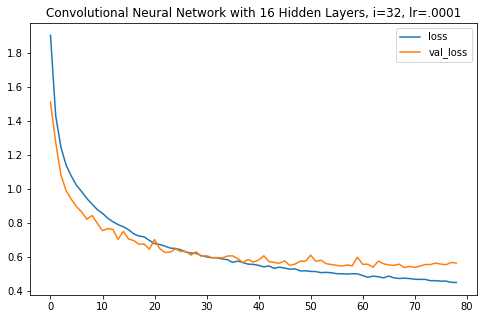

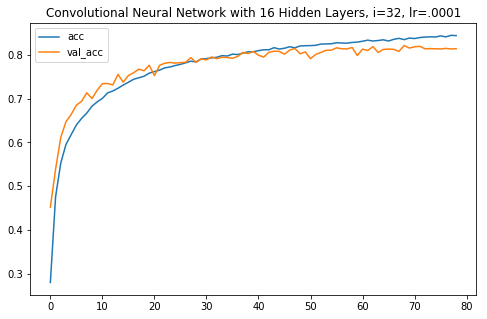

In [47]:
plt.figure(figsize=(8,5));
plt.plot(model32_0001.history['loss']);
plt.plot(model32_0001.history['val_loss']);
plt.legend(['loss','val_loss']);
plt.title('Convolutional Neural Network with 16 Hidden Layers, i=32, lr=.0001');

plt.figure(figsize=(8,5));
plt.plot(model32_0001.history['acc']);
plt.plot(model32_0001.history['val_acc']);
plt.legend(['acc','val_acc']);
plt.title('Convolutional Neural Network with 16 Hidden Layers, i=32, lr=.0001');

plt.savefig('320001l.png')
plt.savefig('320001a.png')

In [21]:
i=32
cnn32_00001 = cnn(i,2*i,4*i,12*i,6*i,2,.001) # i=32, lr=.00001
batch_size = 128
epochs = 100

# Train the model
csv_logger = CSVLogger('cnn32_00001.log')

start = time.time()
model32_00001 = cnn32_00001.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, 
                                validation_data = (X_test, y_test), verbose=1, 
                                callbacks=[csv_logger, EarlyStopping(min_delta=0.0005, patience=10)])
end = time.time()

# save model to HDF5 file
cnn32_00001.save('model32_00001.h5')

# compute test accuracy
scores = cnn32_00001.evaluate(X_test, y_test, verbose=1)
print ("Model took %0.2f minutes to train" % ((end - start)/60))
print ("Accuracy on test data is: %0.2f" % (scores[1]*100))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 32, 32, 32)        416       
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 31, 31, 32)        4128      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_14 (Dropout)         (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 15, 15, 64)        8256      
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 14, 14, 64)        16448     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 7, 7, 64)          0         
__________

50000/50000 [==============================] - 14s 274us/step - loss: 0.5407 - acc: 0.8116 - val_loss: 0.5613 - val_acc: 0.8067
Epoch 40/100
50000/50000 [==============================] - 14s 274us/step - loss: 0.5394 - acc: 0.8134 - val_loss: 0.5997 - val_acc: 0.7939
Epoch 41/100
50000/50000 [==============================] - 14s 274us/step - loss: 0.5291 - acc: 0.8180 - val_loss: 0.5773 - val_acc: 0.8006
Epoch 42/100
50000/50000 [==============================] - 14s 274us/step - loss: 0.5299 - acc: 0.8186 - val_loss: 0.5611 - val_acc: 0.8061
Epoch 43/100
50000/50000 [==============================] - 14s 274us/step - loss: 0.5248 - acc: 0.8168 - val_loss: 0.5788 - val_acc: 0.8000
Epoch 44/100
50000/50000 [==============================] - 14s 274us/step - loss: 0.5254 - acc: 0.8194 - val_loss: 0.5611 - val_acc: 0.8057
Epoch 45/100
50000/50000 [==============================] - 14s 275us/step - loss: 0.5166 - acc: 0.8229 - val_loss: 0.5918 - val_acc: 0.8006
Epoch 46/100
50000/50000 [

Text(0.5,1,'Convolutional Neural Network with 16 Hidden Layers, i=32, lr=.00001')

Text(0.5,1,'Convolutional Neural Network with 16 Hidden Layers, i=32, lr=.00001')

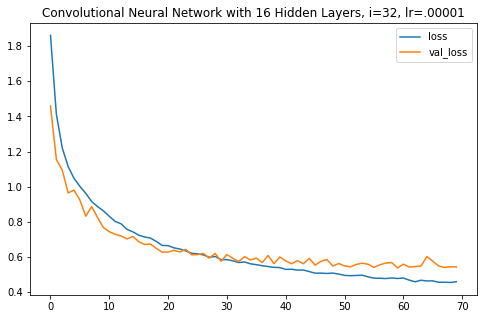

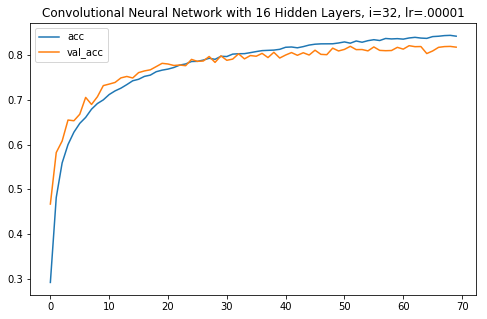

In [46]:
plt.figure(figsize=(8,5));
plt.plot(model32_00001.history['loss']);
plt.plot(model32_00001.history['val_loss']);
plt.legend(['loss','val_loss']);
plt.title('Convolutional Neural Network with 16 Hidden Layers, i=32, lr=.00001');

plt.figure(figsize=(8,5));
plt.plot(model32_00001.history['acc']);
plt.plot(model32_00001.history['val_acc']);
plt.legend(['acc','val_acc']);
plt.title('Convolutional Neural Network with 16 Hidden Layers, i=32, lr=.00001');

plt.savefig('3200001l.png')
plt.savefig('3200001a.png')

-----

In [23]:
i=48
cnn48_001 = cnn(i,2*i,4*i,12*i,6*i,2,.001) # i=48, lr=.001
batch_size = 128
epochs = 100

# Train the model
csv_logger = CSVLogger('cnn48_001.log')

start = time.time()
model48_001 = cnn48_001.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, 
                            validation_data = (X_test, y_test), verbose=1, 
                            callbacks=[csv_logger, EarlyStopping(min_delta=0.0005, patience=10)])
end = time.time()

# save model to HDF5 file
cnn48_001.save('model48_001.h5')

# compute test accuracy
scores = cnn48_001.evaluate(X_test, y_test, verbose=1)
print ("Model took %0.2f minutes to train" % ((end - start)/60))
print ("Accuracy on test data is: %0.2f" % (scores[1]*100))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_25 (Conv2D)           (None, 32, 32, 48)        624       
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 31, 31, 48)        9264      
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 15, 15, 48)        0         
_________________________________________________________________
dropout_19 (Dropout)         (None, 15, 15, 48)        0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 15, 15, 96)        18528     
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 14, 14, 96)        36960     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 7, 7, 96)          0         
__________

50000/50000 [==============================] - 23s 459us/step - loss: 0.4108 - acc: 0.8572 - val_loss: 0.5549 - val_acc: 0.8194
Epoch 40/100
50000/50000 [==============================] - 23s 461us/step - loss: 0.4130 - acc: 0.8567 - val_loss: 0.5324 - val_acc: 0.8228
Epoch 41/100
50000/50000 [==============================] - 23s 460us/step - loss: 0.3981 - acc: 0.8600 - val_loss: 0.5346 - val_acc: 0.8245
Epoch 42/100
50000/50000 [==============================] - 23s 460us/step - loss: 0.4039 - acc: 0.8583 - val_loss: 0.5692 - val_acc: 0.8179
Epoch 43/100
50000/50000 [==============================] - 23s 459us/step - loss: 0.4095 - acc: 0.8588 - val_loss: 0.5408 - val_acc: 0.8251
Epoch 44/100
50000/50000 [==============================] - 23s 456us/step - loss: 0.3875 - acc: 0.8644 - val_loss: 0.5319 - val_acc: 0.8269
Epoch 45/100
50000/50000 [==============================] - 23s 457us/step - loss: 0.3885 - acc: 0.8665 - val_loss: 0.5448 - val_acc: 0.8264
Epoch 46/100
50000/50000 [

Text(0.5,1,'Convolutional Neural Network with 16 Hidden Layers, i=48, lr=.001')

Text(0.5,1,'Convolutional Neural Network with 16 Hidden Layers, i=48, lr=.001')

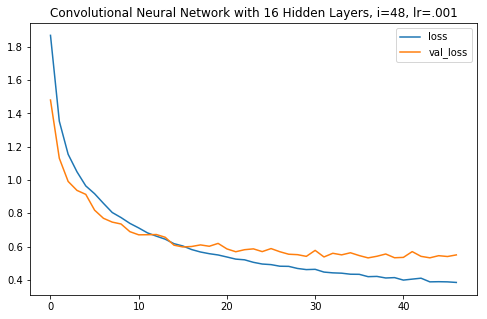

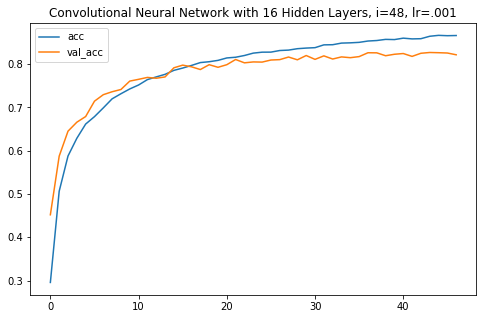

In [43]:
plt.figure(figsize=(8,5));
plt.plot(model48_001.history['loss']);
plt.plot(model48_001.history['val_loss']);
plt.legend(['loss','val_loss']);
plt.title('Convolutional Neural Network with 16 Hidden Layers, i=48, lr=.001');

plt.figure(figsize=(8,5));
plt.plot(model48_001.history['acc']);
plt.plot(model48_001.history['val_acc']);
plt.legend(['acc','val_acc']);
plt.title('Convolutional Neural Network with 16 Hidden Layers, i=48, lr=.001');

plt.savefig('48001l.png')
plt.savefig('48001a.png')

In [25]:
i=48
cnn48_0001 = cnn(i,2*i,4*i,12*i,6*i,2,.001) # i=48, lr=.0001
batch_size = 128
epochs = 100

# Train the model
csv_logger = CSVLogger('cnn48_0001.log')

start = time.time()
model48_0001 = cnn48_0001.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, 
                              validation_data = (X_test, y_test), verbose=1, 
                              callbacks=[csv_logger, EarlyStopping(min_delta=0.0005, patience=10)])
end = time.time()

# save model to HDF5 file
cnn48_0001.save('model48_0001.h5')

# compute test accuracy
scores = cnn48_0001.evaluate(X_test, y_test, verbose=1)
print ("Model took %0.2f minutes to train" % ((end - start)/60))
print ("Accuracy on test data is: %0.2f" % (scores[1]*100))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_31 (Conv2D)           (None, 32, 32, 48)        624       
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 31, 31, 48)        9264      
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 15, 15, 48)        0         
_________________________________________________________________
dropout_24 (Dropout)         (None, 15, 15, 48)        0         
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 15, 15, 96)        18528     
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 14, 14, 96)        36960     
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 7, 7, 96)          0         
__________

50000/50000 [==============================] - 23s 455us/step - loss: 0.4068 - acc: 0.8580 - val_loss: 0.5206 - val_acc: 0.8298
Epoch 40/100
50000/50000 [==============================] - 23s 456us/step - loss: 0.3966 - acc: 0.8615 - val_loss: 0.5459 - val_acc: 0.8217
Epoch 41/100
50000/50000 [==============================] - 23s 459us/step - loss: 0.3903 - acc: 0.8653 - val_loss: 0.5318 - val_acc: 0.8233
Epoch 42/100
50000/50000 [==============================] - 23s 460us/step - loss: 0.3863 - acc: 0.8665 - val_loss: 0.5455 - val_acc: 0.8203
Epoch 43/100
50000/50000 [==============================] - 23s 456us/step - loss: 0.3835 - acc: 0.8665 - val_loss: 0.5482 - val_acc: 0.8238
Epoch 44/100
50000/50000 [==============================] - 23s 456us/step - loss: 0.3848 - acc: 0.8661 - val_loss: 0.5200 - val_acc: 0.8276
Epoch 45/100
50000/50000 [==============================] - 23s 457us/step - loss: 0.3854 - acc: 0.8650 - val_loss: 0.5316 - val_acc: 0.8268
Epoch 46/100
50000/50000 [

Text(0.5,1,'Convolutional Neural Network with 16 Hidden Layers, i=48, lr=.0001')

Text(0.5,1,'Convolutional Neural Network with 16 Hidden Layers, i=48, lr=.0001')

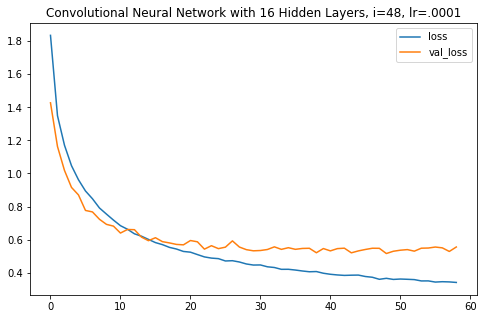

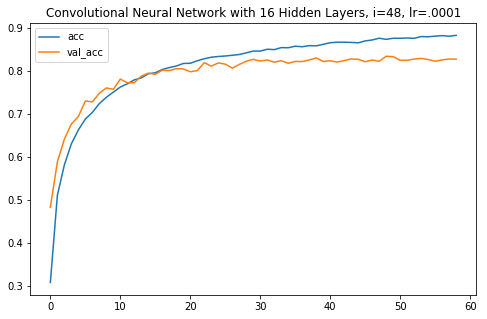

In [44]:
plt.figure(figsize=(8,5));
plt.plot(model48_0001.history['loss']);
plt.plot(model48_0001.history['val_loss']);
plt.legend(['loss','val_loss']);
plt.title('Convolutional Neural Network with 16 Hidden Layers, i=48, lr=.0001');

plt.figure(figsize=(8,5));
plt.plot(model48_0001.history['acc']);
plt.plot(model48_0001.history['val_acc']);
plt.legend(['acc','val_acc']);
plt.title('Convolutional Neural Network with 16 Hidden Layers, i=48, lr=.0001');

plt.savefig('480001l.png')
plt.savefig('480001a.png')

In [27]:
i=48
cnn48_00001 = cnn(i,2*i,4*i,12*i,6*i,2,.001) # i=48, lr=.00001
batch_size = 128
epochs = 100

# Train the model
csv_logger = CSVLogger('cnn48_00001.log')

start = time.time()
model48_00001 = cnn48_00001.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, 
                                validation_data = (X_test, y_test), verbose=1, 
                                callbacks=[csv_logger, EarlyStopping(min_delta=0.0005, patience=10)])
end = time.time()

# save model to HDF5 file
cnn48_00001.save('model48_00001.h5')

# compute test accuracy
scores = cnn48_00001.evaluate(X_test, y_test, verbose=1)
print ("Model took %0.2f minutes to train" % ((end - start)/60))
print ("Accuracy on test data is: %0.2f" % (scores[1]*100))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_37 (Conv2D)           (None, 32, 32, 48)        624       
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 31, 31, 48)        9264      
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 15, 15, 48)        0         
_________________________________________________________________
dropout_29 (Dropout)         (None, 15, 15, 48)        0         
_________________________________________________________________
conv2d_39 (Conv2D)           (None, 15, 15, 96)        18528     
_________________________________________________________________
conv2d_40 (Conv2D)           (None, 14, 14, 96)        36960     
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 7, 7, 96)          0         
__________

50000/50000 [==============================] - 23s 461us/step - loss: 0.4148 - acc: 0.8572 - val_loss: 0.5492 - val_acc: 0.8175
Epoch 40/100
50000/50000 [==============================] - 23s 460us/step - loss: 0.4054 - acc: 0.8601 - val_loss: 0.5612 - val_acc: 0.8153
Epoch 41/100
50000/50000 [==============================] - 23s 458us/step - loss: 0.4018 - acc: 0.8608 - val_loss: 0.5391 - val_acc: 0.8233
Epoch 42/100
50000/50000 [==============================] - 23s 458us/step - loss: 0.4029 - acc: 0.8610 - val_loss: 0.5364 - val_acc: 0.8247
Epoch 43/100
50000/50000 [==============================] - 23s 458us/step - loss: 0.3990 - acc: 0.8637 - val_loss: 0.5586 - val_acc: 0.8163
Epoch 44/100
50000/50000 [==============================] - 23s 457us/step - loss: 0.3897 - acc: 0.8666 - val_loss: 0.5415 - val_acc: 0.8218
Epoch 45/100
50000/50000 [==============================] - 23s 458us/step - loss: 0.3881 - acc: 0.8666 - val_loss: 0.5568 - val_acc: 0.8192
Epoch 46/100
50000/50000 [

Text(0.5,1,'Convolutional Neural Network with 16 Hidden Layers, i=48, lr=.00001')

Text(0.5,1,'Convolutional Neural Network with 16 Hidden Layers, i=48, lr=.00001')

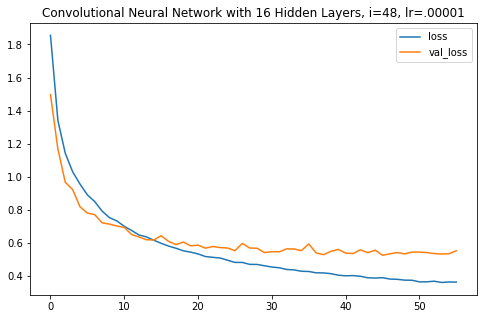

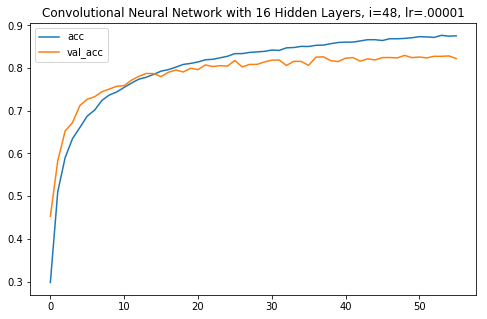

In [45]:
plt.figure(figsize=(8,5));
plt.plot(model48_00001.history['loss']);
plt.plot(model48_00001.history['val_loss']);
plt.legend(['loss','val_loss']);
plt.title('Convolutional Neural Network with 16 Hidden Layers, i=48, lr=.00001');

plt.figure(figsize=(8,5));
plt.plot(model48_00001.history['acc']);
plt.plot(model48_00001.history['val_acc']);
plt.legend(['acc','val_acc']);
plt.title('Convolutional Neural Network with 16 Hidden Layers, i=48, lr=.00001');

plt.savefig('4800001l.png')
plt.savefig('4800001a.png')

---

In [29]:
i=64
cnn64_001 = cnn(i,2*i,4*i,12*i,6*i,2,.001) # i=64, lr=.001
batch_size = 128
epochs = 100

# Train the model
csv_logger = CSVLogger('cnn64_001.log')

start = time.time()
model64_001 = cnn64_001.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, 
                            validation_data = (X_test, y_test), verbose=1, 
                            callbacks=[csv_logger, EarlyStopping(min_delta=0.0005, patience=10)])
end = time.time()

# save model to HDF5 file
cnn64_001.save('model64_001.h5')

# compute test accuracy
scores = cnn64_001.evaluate(X_test, y_test, verbose=1)
print ("Model took %0.2f minutes to train" % ((end - start)/60))
print ("Accuracy on test data is: %0.2f" % (scores[1]*100))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_43 (Conv2D)           (None, 32, 32, 64)        832       
_________________________________________________________________
conv2d_44 (Conv2D)           (None, 31, 31, 64)        16448     
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 15, 15, 64)        0         
_________________________________________________________________
dropout_34 (Dropout)         (None, 15, 15, 64)        0         
_________________________________________________________________
conv2d_45 (Conv2D)           (None, 15, 15, 128)       32896     
_________________________________________________________________
conv2d_46 (Conv2D)           (None, 14, 14, 128)       65664     
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 7, 7, 128)         0         
__________

50000/50000 [==============================] - 30s 601us/step - loss: 0.3525 - acc: 0.8790 - val_loss: 0.5547 - val_acc: 0.8224
Epoch 40/100
50000/50000 [==============================] - 30s 600us/step - loss: 0.3502 - acc: 0.8806 - val_loss: 0.5508 - val_acc: 0.8224
Epoch 41/100
10000/10000 [==============================] - 2s 217us/step
Model took 20.55 minutes to train
Accuracy on test data is: 82.82


Text(0.5,1,'Convolutional Neural Network with 16 Hidden Layers, i=64, lr=.001')

Text(0.5,1,'Convolutional Neural Network with 16 Hidden Layers, i=64, lr=.001')

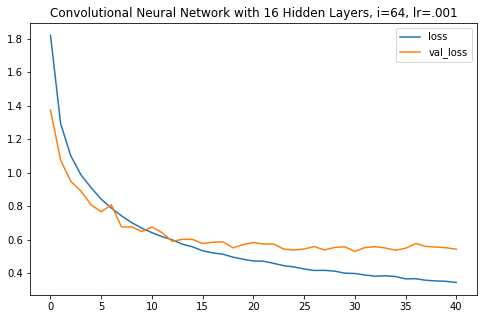

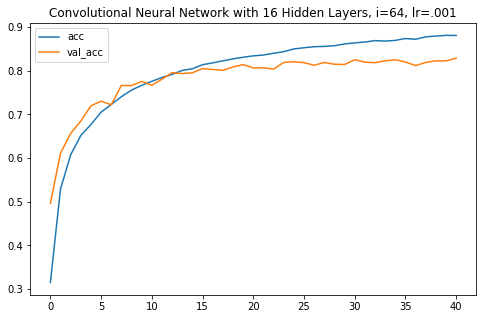

In [39]:
plt.figure(figsize=(8,5));
plt.plot(model64_001.history['loss']);
plt.plot(model64_001.history['val_loss']);
plt.legend(['loss','val_loss']);
plt.title('Convolutional Neural Network with 16 Hidden Layers, i=64, lr=.001');

plt.figure(figsize=(8,5));
plt.plot(model64_001.history['acc']);
plt.plot(model64_001.history['val_acc']);
plt.legend(['acc','val_acc']);
plt.title('Convolutional Neural Network with 16 Hidden Layers, i=64, lr=.001');

plt.savefig('64001l.png')
plt.savefig('64001a.png')

In [31]:
i=64
cnn64_0001 = cnn(i,2*i,4*i,12*i,6*i,2,.001) # i=64, lr=.0001
batch_size = 128
epochs = 100

# Train the model
csv_logger = CSVLogger('cnn64_0001.log')

start = time.time()
model64_0001 = cnn64_0001.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, 
                              validation_data = (X_test, y_test), verbose=1, 
                              callbacks=[csv_logger, EarlyStopping(min_delta=0.0005, patience=10)])
end = time.time()

# save model to HDF5 file
cnn64_0001.save('model64_0001.h5')

# compute test accuracy
scores = cnn64_0001.evaluate(X_test, y_test, verbose=1)
print ("Model took %0.2f minutes to train" % ((end - start)/60))
print ("Accuracy on test data is: %0.2f" % (scores[1]*100))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_49 (Conv2D)           (None, 32, 32, 64)        832       
_________________________________________________________________
conv2d_50 (Conv2D)           (None, 31, 31, 64)        16448     
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 15, 15, 64)        0         
_________________________________________________________________
dropout_39 (Dropout)         (None, 15, 15, 64)        0         
_________________________________________________________________
conv2d_51 (Conv2D)           (None, 15, 15, 128)       32896     
_________________________________________________________________
conv2d_52 (Conv2D)           (None, 14, 14, 128)       65664     
_________________________________________________________________
max_pooling2d_29 (MaxPooling (None, 7, 7, 128)         0         
__________

50000/50000 [==============================] - 30s 599us/step - loss: 0.3474 - acc: 0.8789 - val_loss: 0.5548 - val_acc: 0.8218
Epoch 40/100
50000/50000 [==============================] - 30s 599us/step - loss: 0.3446 - acc: 0.8800 - val_loss: 0.5293 - val_acc: 0.8273
Epoch 41/100
50000/50000 [==============================] - 30s 599us/step - loss: 0.3389 - acc: 0.8832 - val_loss: 0.5487 - val_acc: 0.8225
Epoch 42/100
10000/10000 [==============================] - 2s 217us/step
Model took 21.05 minutes to train
Accuracy on test data is: 82.48


Text(0.5,1,'Convolutional Neural Network with 16 Hidden Layers, i=64, lr=.0001')

Text(0.5,1,'Convolutional Neural Network with 16 Hidden Layers, i=64, lr=.0001')

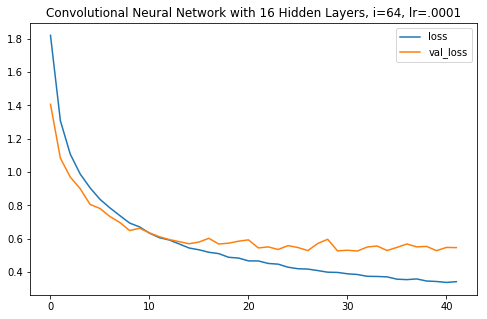

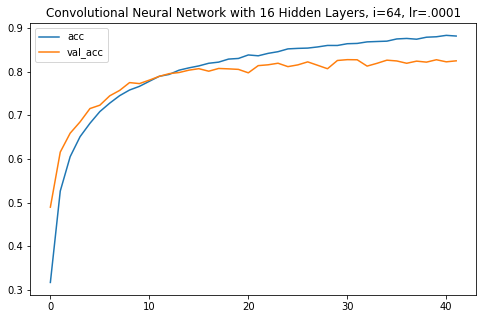

In [40]:
plt.figure(figsize=(8,5));
plt.plot(model64_0001.history['loss']);
plt.plot(model64_0001.history['val_loss']);
plt.legend(['loss','val_loss']);
plt.title('Convolutional Neural Network with 16 Hidden Layers, i=64, lr=.0001');

plt.figure(figsize=(8,5));
plt.plot(model64_0001.history['acc']);
plt.plot(model64_0001.history['val_acc']);
plt.legend(['acc','val_acc']);
plt.title('Convolutional Neural Network with 16 Hidden Layers, i=64, lr=.0001');

plt.savefig('640001l.png')
plt.savefig('640001a.png')

In [33]:
i=64
cnn64_00001 = cnn(i,2*i,4*i,12*i,6*i,2,.001) # i=64, lr=.00001
batch_size = 128
epochs = 100

# Train the model
csv_logger = CSVLogger('cnn64_00001.log')

start = time.time()
model64_00001 = cnn64_00001.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, 
                                validation_data = (X_test, y_test), verbose=1, 
                                callbacks=[csv_logger, EarlyStopping(min_delta=0.0005, patience=10)])
end = time.time()

# save model to HDF5 file
cnn64_00001.save('model64_00001.h5')

# compute test accuracy
scores = cnn64_00001.evaluate(X_test, y_test, verbose=1)
print ("Model took %0.2f minutes to train" % ((end - start)/60))
print ("Accuracy on test data is: %0.2f" % (scores[1]*100))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_55 (Conv2D)           (None, 32, 32, 64)        832       
_________________________________________________________________
conv2d_56 (Conv2D)           (None, 31, 31, 64)        16448     
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 15, 15, 64)        0         
_________________________________________________________________
dropout_44 (Dropout)         (None, 15, 15, 64)        0         
_________________________________________________________________
conv2d_57 (Conv2D)           (None, 15, 15, 128)       32896     
_________________________________________________________________
conv2d_58 (Conv2D)           (None, 14, 14, 128)       65664     
_________________________________________________________________
max_pooling2d_32 (MaxPooling (None, 7, 7, 128)         0         
__________

Text(0.5,1,'Convolutional Neural Network with 16 Hidden Layers, i=64, lr=.00001')

Text(0.5,1,'Convolutional Neural Network with 16 Hidden Layers, i=64, lr=.00001')

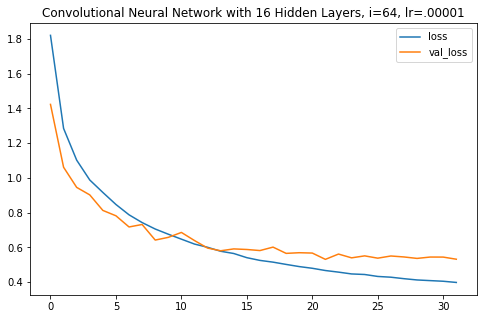

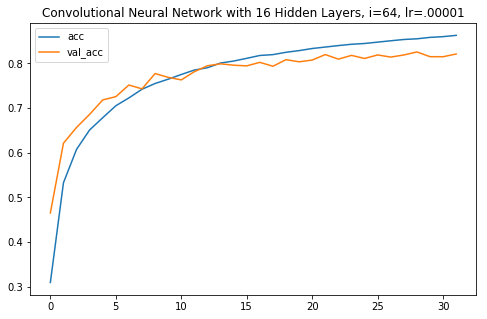

In [36]:
plt.figure(figsize=(8,5));
plt.plot(model64_00001.history['loss']);
plt.plot(model64_00001.history['val_loss']);
plt.legend(['loss','val_loss']);
plt.title('Convolutional Neural Network with 16 Hidden Layers, i=64, lr=.00001');
plt.savefig('6400001l.png')

plt.figure(figsize=(8,5));
plt.plot(model64_00001.history['acc']);
plt.plot(model64_00001.history['val_acc']);
plt.legend(['acc','val_acc']);
plt.title('Convolutional Neural Network with 16 Hidden Layers, i=64, lr=.00001');
plt.savefig('6400001a.png')